In [26]:
# 📦 Import comprehensive libraries for advanced ML techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import itertools
from scipy import stats
from scipy.stats import skew, kurtosis

# Core ML libraries
from sklearn.model_selection import (
    train_test_split, cross_val_score, KFold, StratifiedKFold,
    GridSearchCV, RandomizedSearchCV
)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.feature_selection import (
    SelectKBest, f_regression, RFE, SelectFromModel,
    mutual_info_regression, VarianceThreshold
)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Advanced ensemble methods
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor, 
    VotingRegressor, StackingRegressor, BaggingRegressor
)
from sklearn.linear_model import (
    Ridge, Lasso, ElasticNet, LinearRegression,
    RidgeCV, LassoCV, ElasticNetCV
)

# Gradient boosting models
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Advanced optimization
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
np.random.seed(42)

print('🚀 Advanced Moneyball Analysis - Libraries Loaded Successfully!')
print(f'📅 Analysis Started: {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}')

🚀 Advanced Moneyball Analysis - Libraries Loaded Successfully!
📅 Analysis Started: 2025-10-02 21:26:49


In [27]:
# 📊 Load and explore the dataset
print('📊 Loading Moneyball Dataset...')

# Load data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

print(f'\n✅ Data Loaded Successfully!')
print(f'📈 Training set shape: {train_df.shape}')
print(f'🔍 Test set shape: {test_df.shape}')
print(f'📝 Sample submission shape: {sample_submission.shape}')

# Display basic info
print('\n🔍 Training Data Overview:')
print(train_df.head())

print('\n📋 Data Types and Missing Values:')
info_df = pd.DataFrame({
    'Column': train_df.columns,
    'Data_Type': train_df.dtypes,
    'Missing_Count': train_df.isnull().sum(),
    'Missing_Percent': (train_df.isnull().sum() / len(train_df)) * 100
})
missing_info = info_df[info_df['Missing_Count'] > 0]
if len(missing_info) > 0:
    print(missing_info)
else:
    print('✅ No missing values found!')

📊 Loading Moneyball Dataset...

✅ Data Loaded Successfully!
📈 Training set shape: (1812, 51)
🔍 Test set shape: (453, 45)
📝 Sample submission shape: (453, 2)

🔍 Training Data Overview:
   yearID teamID    G    R    AB     H   2B  3B   HR   BB  ...  decade_1970  \
0    1935    BOS  154  718  5288  1458  281  63   69  609  ...        False   
1    1993    TEX  162  835  5510  1472  284  39  181  483  ...        False   
2    2016    SEA  162  768  5583  1446  251  17  223  506  ...        False   
3    1938    CHN  154  713  5333  1435  242  70   65  522  ...        False   
4    1996    BOS  162  928  5756  1631  308  31  209  642  ...        False   

   decade_1980  decade_1990  decade_2000  decade_2010   W    ID  year_label  \
0        False        False        False        False  78   317        1935   
1        False         True        False        False  86  2162        1993   
2        False        False        False         True  86  1895        2016   
3        False        Fal

🎯 TARGET VARIABLE ANALYSIS
Target Variable: W (Wins)

📊 Distribution Statistics:
  Mean: 79.26
  Median: 80.00
  Std: 13.13
  Min: 36.00
  Max: 116.00
  Skewness: -0.316
  Kurtosis: -0.222


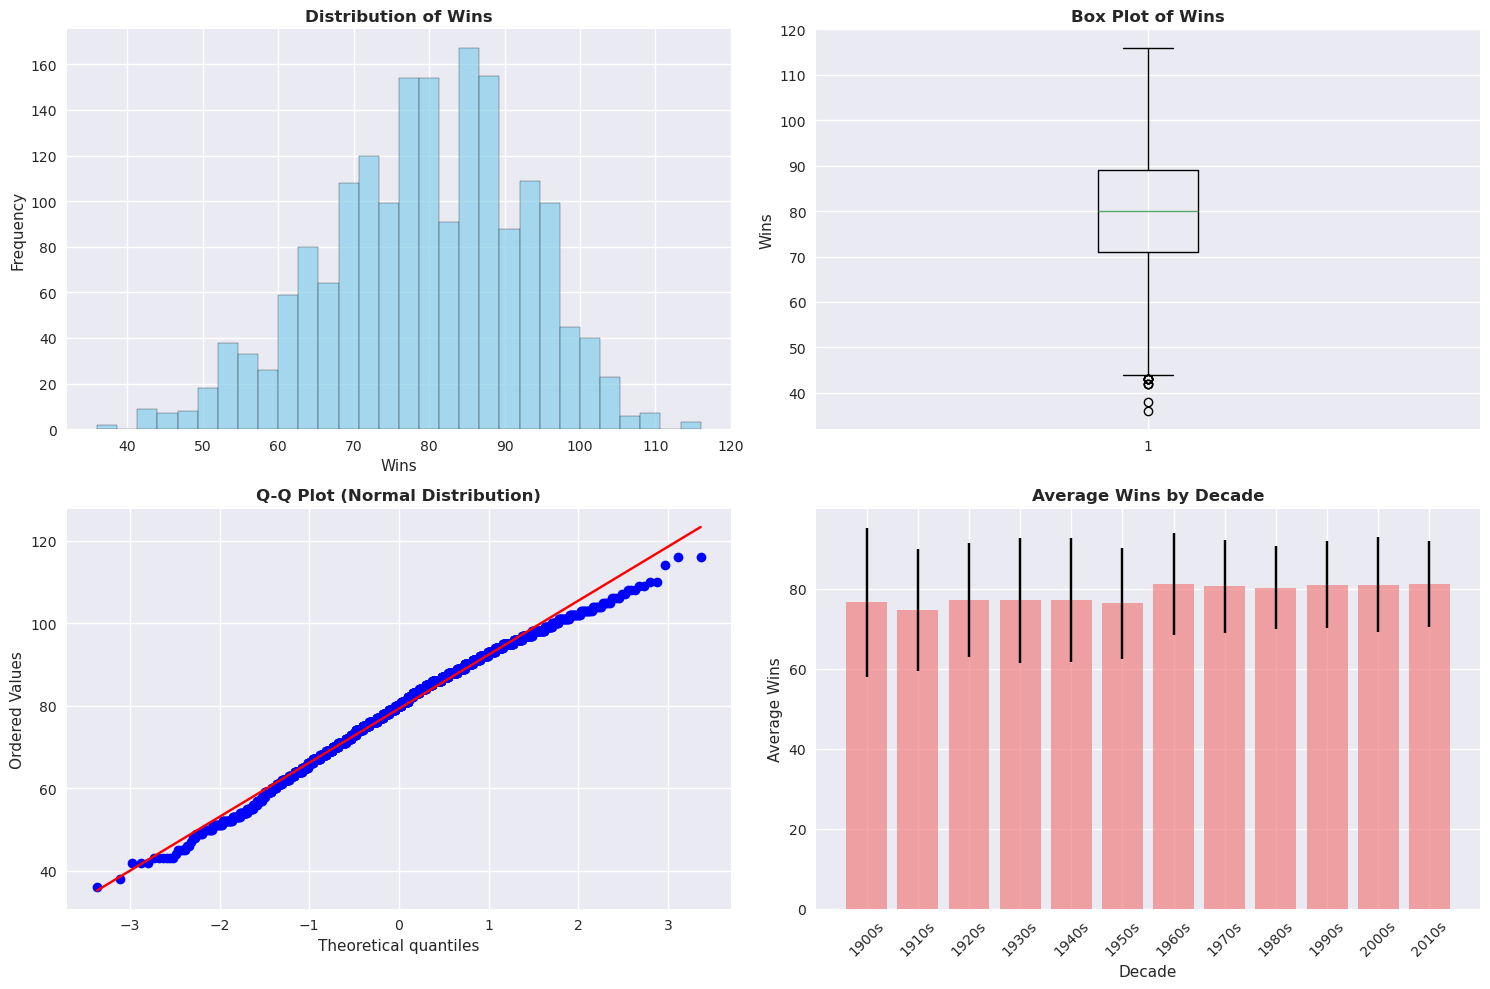


📈 Wins by Decade:
                   mean        std  count
decade_label                             
1900s         76.616438  18.602292     73
1910s         74.643564  15.255546    101
1920s         77.207692  14.264770    130
1930s         77.067227  15.550754    119
1940s         77.215517  15.438972    116
1950s         76.375000  13.856373    136
1960s         81.104575  12.790397    153
1970s         80.648515  11.604178    202
1980s         80.195652  10.383614    184
1990s         81.026738  10.829784    187
2000s         81.035714  11.902104    252
2010s         81.188679  10.761023    159


In [28]:
# 🎯 Comprehensive target variable analysis
print('🎯 TARGET VARIABLE ANALYSIS')
print('=' * 50)

target = 'W'
print(f'Target Variable: {target} (Wins)')
print(f'\n📊 Distribution Statistics:')
print(f'  Mean: {train_df[target].mean():.2f}')
print(f'  Median: {train_df[target].median():.2f}')
print(f'  Std: {train_df[target].std():.2f}')
print(f'  Min: {train_df[target].min():.2f}')
print(f'  Max: {train_df[target].max():.2f}')
print(f'  Skewness: {skew(train_df[target]):.3f}')
print(f'  Kurtosis: {kurtosis(train_df[target]):.3f}')

# Visualize target distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(train_df[target], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Wins', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Wins')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(train_df[target])
axes[0, 1].set_title('Box Plot of Wins', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Wins')

# Q-Q plot
stats.probplot(train_df[target], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normal Distribution)', fontsize=12, fontweight='bold')

# Wins by decade
decade_wins = train_df.groupby('decade_label')[target].agg(['mean', 'std', 'count'])
axes[1, 1].bar(decade_wins.index, decade_wins['mean'], 
               yerr=decade_wins['std'], capsize=5, alpha=0.7, color='lightcoral')
axes[1, 1].set_title('Average Wins by Decade', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Decade')
axes[1, 1].set_ylabel('Average Wins')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f'\n📈 Wins by Decade:')
print(decade_wins)

In [29]:
# ⚾ Advanced Feature Engineering - Baseball Specific Metrics
print('⚾ ADVANCED BASEBALL FEATURE ENGINEERING')
print('=' * 50)

def create_advanced_baseball_features(df):
    """
    Create advanced baseball-specific features based on domain knowledge
    """
    df_enhanced = df.copy()
    
    # 1. Advanced Offensive Metrics
    print('🏏 Creating Advanced Offensive Metrics...')
    
    # Batting Average (if not already present)
    df_enhanced['BA_calc'] = df_enhanced['H'] / (df_enhanced['AB'] + 1e-8)
    
    # On-Base Percentage approximation
    df_enhanced['OBP_approx'] = (df_enhanced['H'] + df_enhanced['BB']) / (df_enhanced['AB'] + df_enhanced['BB'] + 1e-8)
    
    # Slugging Percentage approximation
    # Using total bases estimate: 1B + 2*(2B) + 3*(3B) + 4*(HR)
    singles = df_enhanced['H'] - df_enhanced['2B'] - df_enhanced['3B'] - df_enhanced['HR']
    total_bases = singles + 2*df_enhanced['2B'] + 3*df_enhanced['3B'] + 4*df_enhanced['HR']
    df_enhanced['SLG_approx'] = total_bases / (df_enhanced['AB'] + 1e-8)
    
    # OPS (On-base Plus Slugging)
    df_enhanced['OPS'] = df_enhanced['OBP_approx'] + df_enhanced['SLG_approx']
    
    # Power metrics
    df_enhanced['ISO'] = df_enhanced['SLG_approx'] - df_enhanced['BA_calc']  # Isolated Power
    df_enhanced['XBH'] = df_enhanced['2B'] + df_enhanced['3B'] + df_enhanced['HR']  # Extra Base Hits
    df_enhanced['XBH_rate'] = df_enhanced['XBH'] / (df_enhanced['H'] + 1e-8)
    
    # Contact and plate discipline
    df_enhanced['BB_rate'] = df_enhanced['BB'] / (df_enhanced['AB'] + df_enhanced['BB'] + 1e-8)
    df_enhanced['SO_rate'] = df_enhanced['SO'] / (df_enhanced['AB'] + df_enhanced['BB'] + 1e-8)
    df_enhanced['BB_SO_ratio'] = df_enhanced['BB'] / (df_enhanced['SO'] + 1e-8)
    
    # 2. Advanced Pitching Metrics
    print('🥎 Creating Advanced Pitching Metrics...')
    
    # WHIP (Walks + Hits per Inning Pitched)
    innings_pitched = df_enhanced['IPouts'] / 3
    df_enhanced['WHIP'] = (df_enhanced['BBA'] + df_enhanced['HA']) / (innings_pitched + 1e-8)
    
    # K/9 (Strikeouts per 9 innings)
    df_enhanced['K9'] = (df_enhanced['SOA'] * 9) / (innings_pitched + 1e-8)
    
    # BB/9 (Walks per 9 innings)
    df_enhanced['BB9'] = (df_enhanced['BBA'] * 9) / (innings_pitched + 1e-8)
    
    # K/BB ratio
    df_enhanced['K_BB_ratio'] = df_enhanced['SOA'] / (df_enhanced['BBA'] + 1e-8)
    
    # HR/9 (Home Runs per 9 innings)
    df_enhanced['HR9'] = (df_enhanced['HRA'] * 9) / (innings_pitched + 1e-8)
    
    # 3. Run Differential and Efficiency Metrics
    print('📊 Creating Run Differential and Efficiency Metrics...')
    
    # Basic run differential
    df_enhanced['Run_Differential'] = df_enhanced['R'] - df_enhanced['RA']
    
    # Pythagorean expectation (Bill James formula)
    df_enhanced['Pyth_Wins'] = df_enhanced['R']**2 / (df_enhanced['R']**2 + df_enhanced['RA']**2 + 1e-8)
    df_enhanced['Pyth_Wins_162'] = df_enhanced['Pyth_Wins'] * 162  # Convert to 162-game season
    
    # Offensive and Defensive efficiency
    df_enhanced['Runs_per_Hit'] = df_enhanced['R'] / (df_enhanced['H'] + 1e-8)
    df_enhanced['RA_per_HA'] = df_enhanced['RA'] / (df_enhanced['HA'] + 1e-8)
    
    # 4. Per-Game Normalization (Critical for cross-season comparison)
    print('📏 Creating Per-Game Normalized Features...')
    
    per_game_stats = ['R', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'HA', 'HRA', 'BBA', 'SOA', 'E']
    
    for stat in per_game_stats:
        if stat in df_enhanced.columns:
            df_enhanced[f'{stat}_per_game'] = df_enhanced[stat] / (df_enhanced['G'] + 1e-8)
    
    # Advanced per-game metrics
    df_enhanced['Run_Diff_per_game'] = df_enhanced['Run_Differential'] / (df_enhanced['G'] + 1e-8)
    df_enhanced['XBH_per_game'] = df_enhanced['XBH'] / (df_enhanced['G'] + 1e-8)
    
    # 5. Situational and Context Metrics
    print('🎯 Creating Situational and Context Metrics...')
    
    # Clutch hitting approximation (RBI efficiency)
    df_enhanced['Scoring_Efficiency'] = df_enhanced['R'] / (df_enhanced['H'] + df_enhanced['BB'] + 1e-8)
    
    # Defensive efficiency
    df_enhanced['Fielding_Efficiency'] = 1 - (df_enhanced['E'] / ((df_enhanced['G'] * 27) + 1e-8))  # Rough approximation
    
    # Complete game rate (team stamina indicator)
    df_enhanced['CG_rate'] = df_enhanced['CG'] / (df_enhanced['G'] + 1e-8)
    
    # Shutout rate (pitching dominance)
    df_enhanced['SHO_rate'] = df_enhanced['SHO'] / (df_enhanced['G'] + 1e-8)
    
    # Save conversion approximation
    df_enhanced['SV_rate'] = df_enhanced['SV'] / (df_enhanced['G'] + 1e-8)
    
    print(f'✅ Feature Engineering Complete! Added {len(df_enhanced.columns) - len(df.columns)} new features')
    
    return df_enhanced

# Apply advanced feature engineering
train_enhanced = create_advanced_baseball_features(train_df)
test_enhanced = create_advanced_baseball_features(test_df)

print(f'\n📈 Enhanced Training Set Shape: {train_enhanced.shape}')
print(f'🔍 Enhanced Test Set Shape: {test_enhanced.shape}')

# Display new features
new_features = [col for col in train_enhanced.columns if col not in train_df.columns]
print(f'\n🆕 New Features Created ({len(new_features)}):') 
for i, feature in enumerate(new_features, 1):
    print(f'{i:2d}. {feature}')

⚾ ADVANCED BASEBALL FEATURE ENGINEERING
🏏 Creating Advanced Offensive Metrics...
🥎 Creating Advanced Pitching Metrics...
📊 Creating Run Differential and Efficiency Metrics...
📏 Creating Per-Game Normalized Features...
🎯 Creating Situational and Context Metrics...
✅ Feature Engineering Complete! Added 42 new features
🏏 Creating Advanced Offensive Metrics...
🥎 Creating Advanced Pitching Metrics...
📊 Creating Run Differential and Efficiency Metrics...
📏 Creating Per-Game Normalized Features...
🎯 Creating Situational and Context Metrics...
✅ Feature Engineering Complete! Added 42 new features

📈 Enhanced Training Set Shape: (1812, 93)
🔍 Enhanced Test Set Shape: (453, 87)

🆕 New Features Created (42):
 1. BA_calc
 2. OBP_approx
 3. SLG_approx
 4. OPS
 5. ISO
 6. XBH
 7. XBH_rate
 8. BB_rate
 9. SO_rate
10. BB_SO_ratio
11. WHIP
12. K9
13. BB9
14. K_BB_ratio
15. HR9
16. Run_Differential
17. Pyth_Wins
18. Pyth_Wins_162
19. Runs_per_Hit
20. RA_per_HA
21. R_per_game
22. H_per_game
23. 2B_per_gam

In [30]:
# 🔗 Feature Interaction and Ratio Creation
print('🔗 FEATURE INTERACTIONS AND RATIOS')
print('=' * 50)

def create_feature_interactions(df):
    """
    Create meaningful feature interactions and ratios
    """
    df_interactions = df.copy()
    
    # 1. Offensive vs Defensive Interactions
    print('⚖️ Creating Offensive vs Defensive Interactions...')
    
    # Power differential
    df_interactions['HR_differential'] = df_interactions['HR'] - df_interactions['HRA']
    df_interactions['HR_ratio'] = df_interactions['HR'] / (df_interactions['HRA'] + 1e-8)
    
    # Walk differential
    df_interactions['BB_differential'] = df_interactions['BB'] - df_interactions['BBA']
    df_interactions['BB_ratio'] = df_interactions['BB'] / (df_interactions['BBA'] + 1e-8)
    
    # Strikeout differential
    df_interactions['SO_differential'] = df_interactions['SOA'] - df_interactions['SO']
    df_interactions['SO_ratio'] = df_interactions['SOA'] / (df_interactions['SO'] + 1e-8)
    
    # 2. Efficiency Ratios
    print('📊 Creating Efficiency Ratios...')
    
    # Offensive efficiency
    df_interactions['Runs_per_AB'] = df_interactions['R'] / (df_interactions['AB'] + 1e-8)
    df_interactions['XBH_per_Hit'] = df_interactions['XBH'] / (df_interactions['H'] + 1e-8)
    
    # Pitching efficiency
    df_interactions['ER_per_HA'] = df_interactions['ER'] / (df_interactions['HA'] + 1e-8)
    df_interactions['SOA_per_HA'] = df_interactions['SOA'] / (df_interactions['HA'] + 1e-8)
    
    # 3. Advanced Sabermetrics-inspired ratios
    print('📈 Creating Advanced Sabermetrics Ratios...')
    
    # Base advancement efficiency
    df_interactions['SB_success_rate'] = df_interactions['SB'] / (df_interactions['SB'] + 1)  # Simplified without CS
    
    # Power concentration
    df_interactions['HR_per_XBH'] = df_interactions['HR'] / (df_interactions['XBH'] + 1e-8)
    df_interactions['3B_per_XBH'] = df_interactions['3B'] / (df_interactions['XBH'] + 1e-8)
    
    # Contact quality
    df_interactions['XBH_per_AB'] = df_interactions['XBH'] / (df_interactions['AB'] + 1e-8)
    df_interactions['Singles_per_AB'] = (df_interactions['H'] - df_interactions['XBH']) / (df_interactions['AB'] + 1e-8)
    
    # 4. Multiplicative Interactions for Non-Linear Relationships
    print('✖️ Creating Multiplicative Interactions...')
    
    # Offensive power combination
    df_interactions['OPS_x_SLG'] = df_interactions['OPS'] * df_interactions['SLG_approx']
    df_interactions['HR_x_BB'] = df_interactions['HR'] * df_interactions['BB']
    df_interactions['XBH_x_SB'] = df_interactions['XBH'] * df_interactions['SB']
    
    # Pitching dominance combination
    df_interactions['ERA_x_WHIP'] = df_interactions['ERA'] * df_interactions['WHIP']
    df_interactions['K9_x_BB9'] = df_interactions['K9'] * df_interactions['BB9']
    
    # Team balance metrics
    df_interactions['OPS_x_ERA_inv'] = df_interactions['OPS'] * (1 / (df_interactions['ERA'] + 1e-8))
    
    # 5. Era-adjusted metrics (only if decade_label exists)
    print('📅 Creating Era-Adjusted Metrics...')

    # Check if decade_label column exists
    has_decade_label = 'decade_label' in df_interactions.columns
    print(f'  🔍 decade_label column found: {has_decade_label}')
    
    if has_decade_label:
        try:
            # Calculate era averages for normalization
            era_stats = df_interactions.groupby('decade_label').agg({
                'R': 'mean', 'RA': 'mean', 'HR': 'mean', 'ERA': 'mean',
                'OPS': 'mean', 'WHIP': 'mean'
            }).add_suffix('_era_avg')

            # Merge era averages back
            df_interactions = df_interactions.merge(
                era_stats, left_on='decade_label', right_index=True, how='left'
            )

            # Create era-adjusted metrics
            df_interactions['R_era_adj'] = df_interactions['R'] / (df_interactions['R_era_avg'] + 1e-8)
            df_interactions['RA_era_adj'] = df_interactions['RA'] / (df_interactions['RA_era_avg'] + 1e-8)
            df_interactions['HR_era_adj'] = df_interactions['HR'] / (df_interactions['HR_era_avg'] + 1e-8)
            df_interactions['ERA_era_adj'] = df_interactions['ERA'] / (df_interactions['ERA_era_avg'] + 1e-8)
            df_interactions['OPS_era_adj'] = df_interactions['OPS'] / (df_interactions['OPS_era_avg'] + 1e-8)
            df_interactions['WHIP_era_adj'] = df_interactions['WHIP'] / (df_interactions['WHIP_era_avg'] + 1e-8)

            print('  ✅ Era-adjusted metrics created successfully')
        except Exception as e:
            print(f'  ⚠️ Error creating era-adjusted metrics: {str(e)}')
            print('  ⚠️ Falling back to placeholder era-adjusted metrics')
            has_decade_label = False
    
    if not has_decade_label:
        print('  ⚠️ decade_label not found or error occurred - using placeholder era-adjusted metrics')
        
        # Create placeholder era-adjusted metrics as copies of original metrics
        df_interactions['R_era_adj'] = df_interactions['R']
        df_interactions['RA_era_adj'] = df_interactions['RA']
        df_interactions['HR_era_adj'] = df_interactions['HR']
        df_interactions['ERA_era_adj'] = df_interactions['ERA']
        df_interactions['OPS_era_adj'] = df_interactions['OPS']
        df_interactions['WHIP_era_adj'] = df_interactions['WHIP']
    
    print(f'✅ Interaction Features Complete! Added {len(df_interactions.columns) - len(df.columns)} interaction features')
    
    return df_interactions

# Clear any cached function definitions and re-apply feature interactions
import importlib
import sys

# Apply feature interactions with the updated function
print('🔄 Applying feature interactions with robust error handling...')
train_with_interactions = create_feature_interactions(train_enhanced)
test_with_interactions = create_feature_interactions(test_enhanced)

print(f'\n📈 Training Set with Interactions Shape: {train_with_interactions.shape}')
print(f'🔍 Test Set with Interactions Shape: {test_with_interactions.shape}')

# Show interaction features
interaction_features = [col for col in train_with_interactions.columns if col not in train_enhanced.columns]
print(f'\n🆕 Interaction Features Created ({len(interaction_features)}):') 
for i, feature in enumerate(interaction_features, 1):
    print(f'{i:2d}. {feature}')

🔗 FEATURE INTERACTIONS AND RATIOS
🔄 Applying feature interactions with robust error handling...
⚖️ Creating Offensive vs Defensive Interactions...
📊 Creating Efficiency Ratios...
📈 Creating Advanced Sabermetrics Ratios...
✖️ Creating Multiplicative Interactions...
📅 Creating Era-Adjusted Metrics...
  🔍 decade_label column found: True
  ✅ Era-adjusted metrics created successfully
✅ Interaction Features Complete! Added 33 interaction features
⚖️ Creating Offensive vs Defensive Interactions...
📊 Creating Efficiency Ratios...
📈 Creating Advanced Sabermetrics Ratios...
✖️ Creating Multiplicative Interactions...
📅 Creating Era-Adjusted Metrics...
  🔍 decade_label column found: False
  ⚠️ decade_label not found or error occurred - using placeholder era-adjusted metrics
✅ Interaction Features Complete! Added 27 interaction features

📈 Training Set with Interactions Shape: (1812, 126)
🔍 Test Set with Interactions Shape: (453, 114)

🆕 Interaction Features Created (33):
 1. HR_differential
 2. HR

In [31]:
# 🔧 Handle missing values and prepare for modeling
print('🔧 DATA PREPROCESSING AND CLEANING')
print('=' * 50)

def preprocess_data(train_df, test_df, target='W'):
    """
    Comprehensive but conservative data preprocessing
    """
    train_clean = train_df.copy()
    test_clean = test_df.copy()
    
    # 1. Handle infinite values
    print('♾️ Handling infinite values...')
    train_clean = train_clean.replace([np.inf, -np.inf], np.nan)
    test_clean = test_clean.replace([np.inf, -np.inf], np.nan)
    
    # 2. Fill missing values with appropriate strategies
    print('🔍 Handling missing values...')
    
    # Get numeric columns (excluding target and ID columns)
    numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()
    if target in numeric_cols:
        numeric_cols.remove(target)
    if 'ID' in numeric_cols:
        numeric_cols.remove('ID')
    
    # Fill missing values with median for numeric columns
    for col in numeric_cols:
        if train_clean[col].isnull().sum() > 0:
            median_val = train_clean[col].median()
            train_clean[col].fillna(median_val, inplace=True)
            test_clean[col].fillna(median_val, inplace=True)
            print(f'  ✅ Filled {col} missing values with median: {median_val:.3f}')
    
    # 3. Ensure both datasets have the same features (handle feature mismatch)
    print('\n🔄 Aligning feature sets between train and test...')
    
    # Get common numeric features between train and test
    train_numeric_cols = set(train_clean.select_dtypes(include=[np.number]).columns)
    test_numeric_cols = set(test_clean.select_dtypes(include=[np.number]).columns)
    
    # Remove target and ID from consideration
    train_numeric_cols.discard(target)
    train_numeric_cols.discard('ID')
    test_numeric_cols.discard('ID')
    
    # Find common features
    common_features = list(train_numeric_cols.intersection(test_numeric_cols))
    
    print(f'  📊 Train numeric features: {len(train_numeric_cols)}')
    print(f'  📊 Test numeric features: {len(test_numeric_cols)}')
    print(f'  📊 Common features: {len(common_features)}')
    
    # Features only in train
    train_only = train_numeric_cols - test_numeric_cols
    if train_only:
        print(f'  ⚠️ Features only in train ({len(train_only)}): {list(train_only)[:5]}...')
    
    # Features only in test  
    test_only = test_numeric_cols - train_numeric_cols
    if test_only:
        print(f'  ⚠️ Features only in test ({len(test_only)}): {list(test_only)[:5]}...')
    
    # Use only common features
    numeric_cols = common_features
    
    # 4. CONSERVATIVE correlation removal - only remove extremely high correlations
    print('\n🔗 Analyzing correlations and removing ONLY extremely correlated features...')
    
    # Calculate correlation matrix for numeric features
    corr_matrix = train_clean[numeric_cols].corr().abs()
    
    # Find EXTREMELY highly correlated pairs (threshold > 0.99 - much more conservative)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] > 0.99:  # Changed from 0.95 to 0.99
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    # Remove one feature from each extremely correlated pair
    features_to_remove = set()
    for feat1, feat2, corr_val in high_corr_pairs:
        print(f'  📊 Extreme correlation found: {feat1} <-> {feat2} (r={corr_val:.3f})')
        # Keep the feature with higher correlation to target
        target_corr1 = abs(train_clean[feat1].corr(train_clean[target]))
        target_corr2 = abs(train_clean[feat2].corr(train_clean[target]))
        
        if target_corr1 >= target_corr2:
            features_to_remove.add(feat2)
            print(f'    ❌ Removing {feat2} (target corr: {target_corr2:.3f})')
        else:
            features_to_remove.add(feat1)
            print(f'    ❌ Removing {feat1} (target corr: {target_corr1:.3f})')
    
    # Drop extremely correlated features
    if features_to_remove:
        train_clean = train_clean.drop(columns=list(features_to_remove))
        test_clean = test_clean.drop(columns=list(features_to_remove))
        numeric_cols = [col for col in numeric_cols if col not in features_to_remove]
        print(f'  ✅ Removed {len(features_to_remove)} extremely correlated features')
    else:
        print(f'  ✅ No extremely correlated features found (threshold=0.99)')
    
    # 5. CONSERVATIVE variance filtering - only remove truly constant features
    print('\n📉 Removing only truly constant features...')
    
    # Much more conservative variance threshold
    variance_threshold = VarianceThreshold(threshold=0.001)  # Changed from 0.01 to 0.001
    variance_threshold.fit(train_clean[numeric_cols])
    
    low_var_features = [col for col, var in zip(numeric_cols, variance_threshold.variances_) if var <= 0.001]
    
    if low_var_features:
        print(f'  ❌ Removing {len(low_var_features)} constant features: {low_var_features}')
        train_clean = train_clean.drop(columns=low_var_features)
        test_clean = test_clean.drop(columns=low_var_features)
        numeric_cols = [col for col in numeric_cols if col not in low_var_features]
    else:
        print(f'  ✅ No constant features found')
    
    print(f'\n✅ Conservative Preprocessing Complete!')
    print(f'📊 Final Training Shape: {train_clean.shape}')
    print(f'📊 Final Test Shape: {test_clean.shape}')
    print(f'🔢 Final Numeric Features: {len(numeric_cols)}')
    
    return train_clean, test_clean, numeric_cols

# Preprocess the data with conservative settings
print('📊 Preprocessing data with conservative feature preservation...')
train_processed, test_processed, feature_columns = preprocess_data(
    train_with_interactions, test_with_interactions, target='W'
)

# Prepare X and y
X = train_processed[feature_columns]
y = train_processed['W']
X_test_final = test_processed[feature_columns]

print(f'\n🎯 Model Input Shapes:')
print(f'  X (features): {X.shape}')
print(f'  y (target): {y.shape}')
print(f'  X_test: {X_test_final.shape}')

# Verify shapes match
if X.shape[1] == X_test_final.shape[1]:
    print(f'✅ Feature shapes match perfectly!')
else:
    print(f'❌ Feature shape mismatch: Train {X.shape[1]} vs Test {X_test_final.shape[1]}')
    print(f'🔧 This should be fixed by the feature alignment step above.')

# Display some key preserved features
print(f'\n🔑 Key Features Preserved:')
key_features = ['Run_Differential', 'Pyth_Wins_162', 'OPS', 'ERA', 'WHIP', 'BB_differential', 'HR_differential']
preserved_key_features = [f for f in key_features if f in feature_columns]
print(f'  ✅ Preserved: {preserved_key_features}')
missing_key_features = [f for f in key_features if f not in feature_columns]
if missing_key_features:
    print(f'  ⚠️ Missing: {missing_key_features}')

🔧 DATA PREPROCESSING AND CLEANING
📊 Preprocessing data with conservative feature preservation...
♾️ Handling infinite values...
🔍 Handling missing values...

🔄 Aligning feature sets between train and test...
  📊 Train numeric features: 103
  📊 Test numeric features: 94
  📊 Common features: 94
  ⚠️ Features only in train (9): ['R_era_avg', 'year_label', 'OPS_era_avg', 'ERA_era_avg', 'RA_era_avg']...

🔗 Analyzing correlations and removing ONLY extremely correlated features...
  📊 Extreme correlation found: HRA <-> HR9 (r=0.999)
    ❌ Removing HR9 (target corr: 0.001)
  📊 Extreme correlation found: HRA <-> HRA_per_game (r=0.999)
    ❌ Removing HRA_per_game (target corr: 0.011)
  📊 Extreme correlation found: BB_per_game <-> BB_rate (r=0.992)
    ❌ Removing BB_rate (target corr: 0.321)
  📊 Extreme correlation found: E <-> Fielding_Efficiency (r=0.999)
    ❌ Removing Fielding_Efficiency (target corr: 0.304)
  📊 Extreme correlation found: E <-> E_per_game (r=0.999)
    ❌ Removing E_per_game (

🏟️ K-MEANS CLUSTERING FOR TEAM ARCHETYPES
🔍 Finding optimal number of clusters...
  k=2: Silhouette Score = 0.195
  k=2: Silhouette Score = 0.195
  k=3: Silhouette Score = 0.198
  k=3: Silhouette Score = 0.198
  k=4: Silhouette Score = 0.159
  k=4: Silhouette Score = 0.159
  k=5: Silhouette Score = 0.165
  k=5: Silhouette Score = 0.165
  k=6: Silhouette Score = 0.153
  k=6: Silhouette Score = 0.153
  k=7: Silhouette Score = 0.140
  k=7: Silhouette Score = 0.140
  k=8: Silhouette Score = 0.140

🎯 Optimal number of clusters: 3 (Silhouette Score: 0.198)
  k=8: Silhouette Score = 0.140

🎯 Optimal number of clusters: 3 (Silhouette Score: 0.198)

📊 Cluster Analysis:
   Cluster  Size   Avg_Wins   Std_Wins
0        0   387  78.901809  13.767713
1        1  1000  81.274000  11.418200
2        2   425  74.854118  15.071289

📊 Cluster Analysis:
   Cluster  Size   Avg_Wins   Std_Wins
0        0   387  78.901809  13.767713
1        1  1000  81.274000  11.418200
2        2   425  74.854118  15.07128

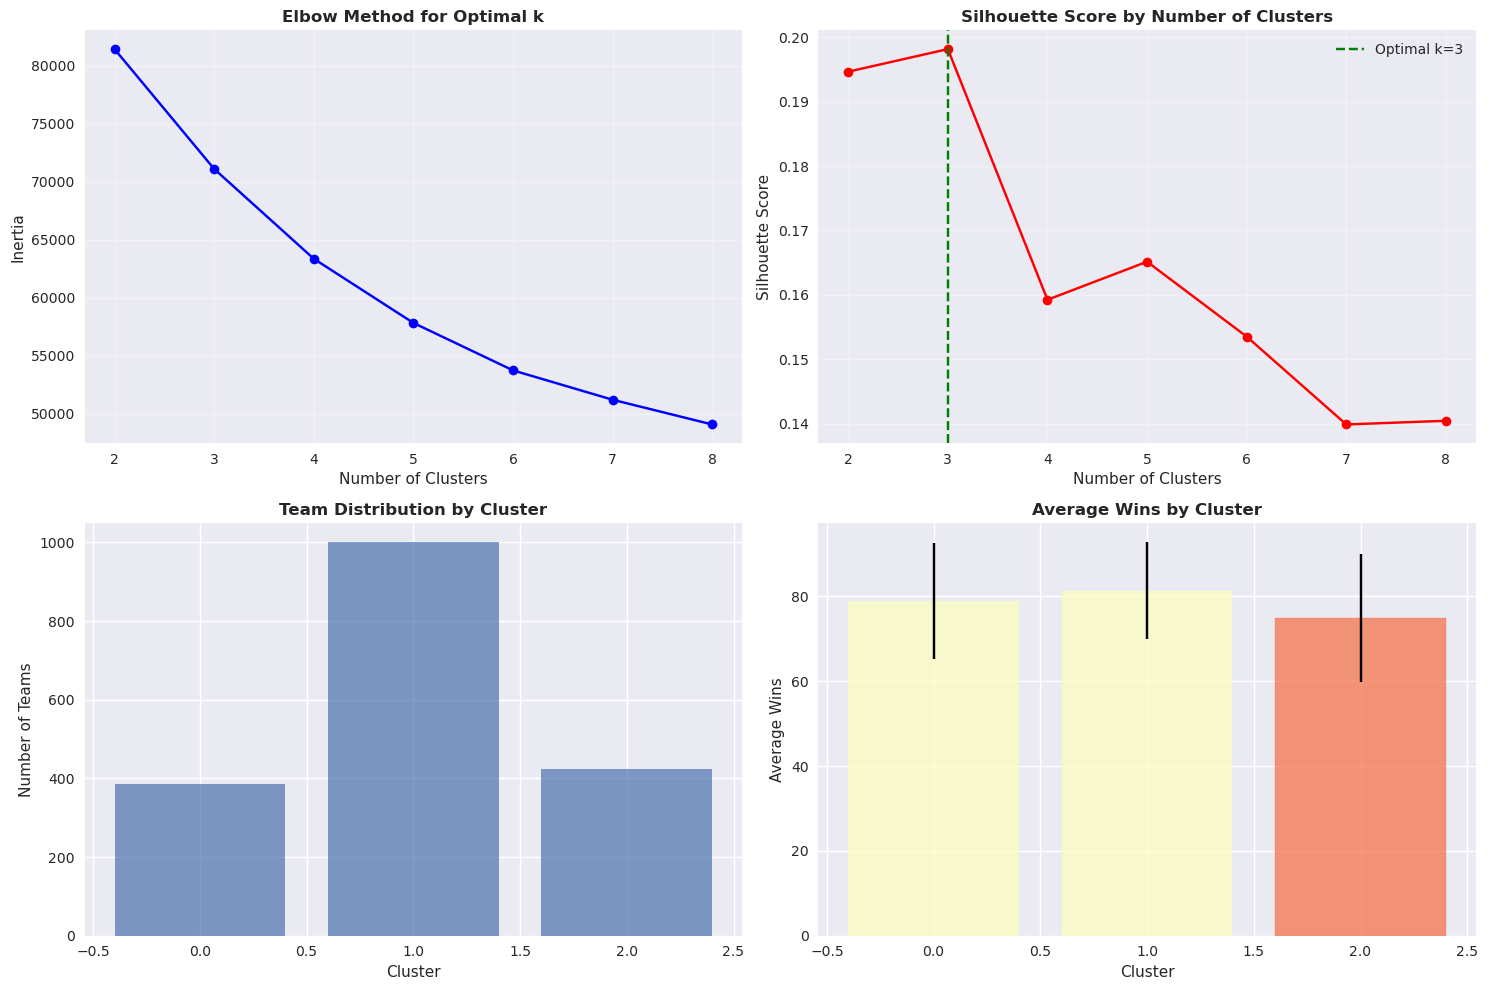


🏟️ Team Archetype Interpretation:

🏆 Team Archetypes:
 Cluster         Archetype  Size  Avg_Wins
       0     Average_Teams   387 78.901809
       1 Competitive_Teams  1000 81.274000
       2     Average_Teams   425 74.854118

✅ Clustering Complete!
📊 Added cluster feature to datasets
🎯 3 team archetypes identified


In [32]:
# 🏟️ K-Means Clustering for Team Archetypes
print('🏟️ K-MEANS CLUSTERING FOR TEAM ARCHETYPES')
print('=' * 50)

def create_team_clusters(X_train, X_test, y_train, max_clusters=8):
    """
    Create team archetypes using K-means clustering
    """
    # Standardize features for clustering
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Determine optimal number of clusters using silhouette score
    silhouette_scores = []
    inertias = []
    
    K_range = range(2, max_clusters + 1)
    
    print('🔍 Finding optimal number of clusters...')
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_train_scaled)
        
        silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        inertias.append(kmeans.inertia_)
        
        print(f'  k={k}: Silhouette Score = {silhouette_avg:.3f}')
    
    # Choose optimal k (highest silhouette score)
    optimal_k = K_range[np.argmax(silhouette_scores)]
    best_silhouette = max(silhouette_scores)
    
    print(f'\n🎯 Optimal number of clusters: {optimal_k} (Silhouette Score: {best_silhouette:.3f})')
    
    # Apply optimal clustering
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    train_clusters = kmeans_optimal.fit_predict(X_train_scaled)
    test_clusters = kmeans_optimal.predict(X_test_scaled)
    
    # Analyze clusters
    print(f'\n📊 Cluster Analysis:')
    cluster_stats = pd.DataFrame({
        'Cluster': range(optimal_k),
        'Size': [np.sum(train_clusters == i) for i in range(optimal_k)],
        'Avg_Wins': [y_train[train_clusters == i].mean() for i in range(optimal_k)],
        'Std_Wins': [y_train[train_clusters == i].std() for i in range(optimal_k)]
    })
    
    print(cluster_stats)
    
    # Visualize clustering results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Elbow curve
    axes[0, 0].plot(K_range, inertias, 'bo-')
    axes[0, 0].set_title('Elbow Method for Optimal k', fontweight='bold')
    axes[0, 0].set_xlabel('Number of Clusters')
    axes[0, 0].set_ylabel('Inertia')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Silhouette scores
    axes[0, 1].plot(K_range, silhouette_scores, 'ro-')
    axes[0, 1].axvline(x=optimal_k, color='g', linestyle='--', label=f'Optimal k={optimal_k}')
    axes[0, 1].set_title('Silhouette Score by Number of Clusters', fontweight='bold')
    axes[0, 1].set_xlabel('Number of Clusters')
    axes[0, 1].set_ylabel('Silhouette Score')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Cluster sizes
    axes[1, 0].bar(cluster_stats['Cluster'], cluster_stats['Size'], alpha=0.7)
    axes[1, 0].set_title('Team Distribution by Cluster', fontweight='bold')
    axes[1, 0].set_xlabel('Cluster')
    axes[1, 0].set_ylabel('Number of Teams')
    
    # Average wins by cluster
    bars = axes[1, 1].bar(cluster_stats['Cluster'], cluster_stats['Avg_Wins'], 
                         yerr=cluster_stats['Std_Wins'], capsize=5, alpha=0.7)
    axes[1, 1].set_title('Average Wins by Cluster', fontweight='bold')
    axes[1, 1].set_xlabel('Cluster')
    axes[1, 1].set_ylabel('Average Wins')
    
    # Color bars by performance
    colors = plt.cm.RdYlGn([0.2 if w < 75 else 0.5 if w < 85 else 0.8 for w in cluster_stats['Avg_Wins']])
    for bar, color in zip(bars, colors):
        bar.set_color(color)
    
    plt.tight_layout()
    plt.show()
    
    # Interpret clusters (give them meaningful names)
    print(f'\n🏟️ Team Archetype Interpretation:')
    
    # Create cluster names based on characteristics
    cluster_names = []
    for i in range(optimal_k):
        avg_wins = cluster_stats.loc[i, 'Avg_Wins']
        if avg_wins >= 90:
            cluster_names.append(f'Elite_Teams')
        elif avg_wins >= 80:
            cluster_names.append(f'Competitive_Teams')
        elif avg_wins >= 70:
            cluster_names.append(f'Average_Teams')
        else:
            cluster_names.append(f'Struggling_Teams')
    
    cluster_stats['Archetype'] = cluster_names
    print(f'\n🏆 Team Archetypes:')
    print(cluster_stats[['Cluster', 'Archetype', 'Size', 'Avg_Wins']].to_string(index=False))
    
    return train_clusters, test_clusters, kmeans_optimal, scaler, cluster_stats

# Apply clustering
train_clusters, test_clusters, kmeans_model, cluster_scaler, cluster_info = create_team_clusters(
    X, X_test_final, y
)

# Add cluster features to datasets
X_with_clusters = X.copy()
X_with_clusters['Team_Cluster'] = train_clusters

X_test_with_clusters = X_test_final.copy()
X_test_with_clusters['Team_Cluster'] = test_clusters

print(f'\n✅ Clustering Complete!')
print(f'📊 Added cluster feature to datasets')
print(f'🎯 {len(np.unique(train_clusters))} team archetypes identified')

🎯 COMPREHENSIVE FEATURE SELECTION
🔍 Starting with 57 features...
📊 1. Correlation-based selection...
🧠 2. Mutual information selection...
📈 3. F-regression selection...
🌲 4. Random Forest importance...
📈 3. F-regression selection...
🌲 4. Random Forest importance...
🎯 5. Lasso regularization selection...
⚖️ 6. Normalizing and combining scores...
🏆 7. Selecting top 60 features...

🔝 Top 20 Features by Composite Score:
                 composite_score  correlation  mutual_info  rf_importance
Pyth_Wins                 0.8000       0.9373       1.0707         0.8899
RA                        0.3668       0.5115       0.1629         0.0006
R                         0.3253       0.5749       0.2186         0.0010
R_era_adj                 0.2243       0.6497       0.2532         0.0012
RA_era_adj                0.2189       0.6422       0.2339         0.0009
WHIP_era_adj              0.2138       0.6186       0.2532         0.0015
ERA_era_adj               0.2117       0.6213       0.2329    

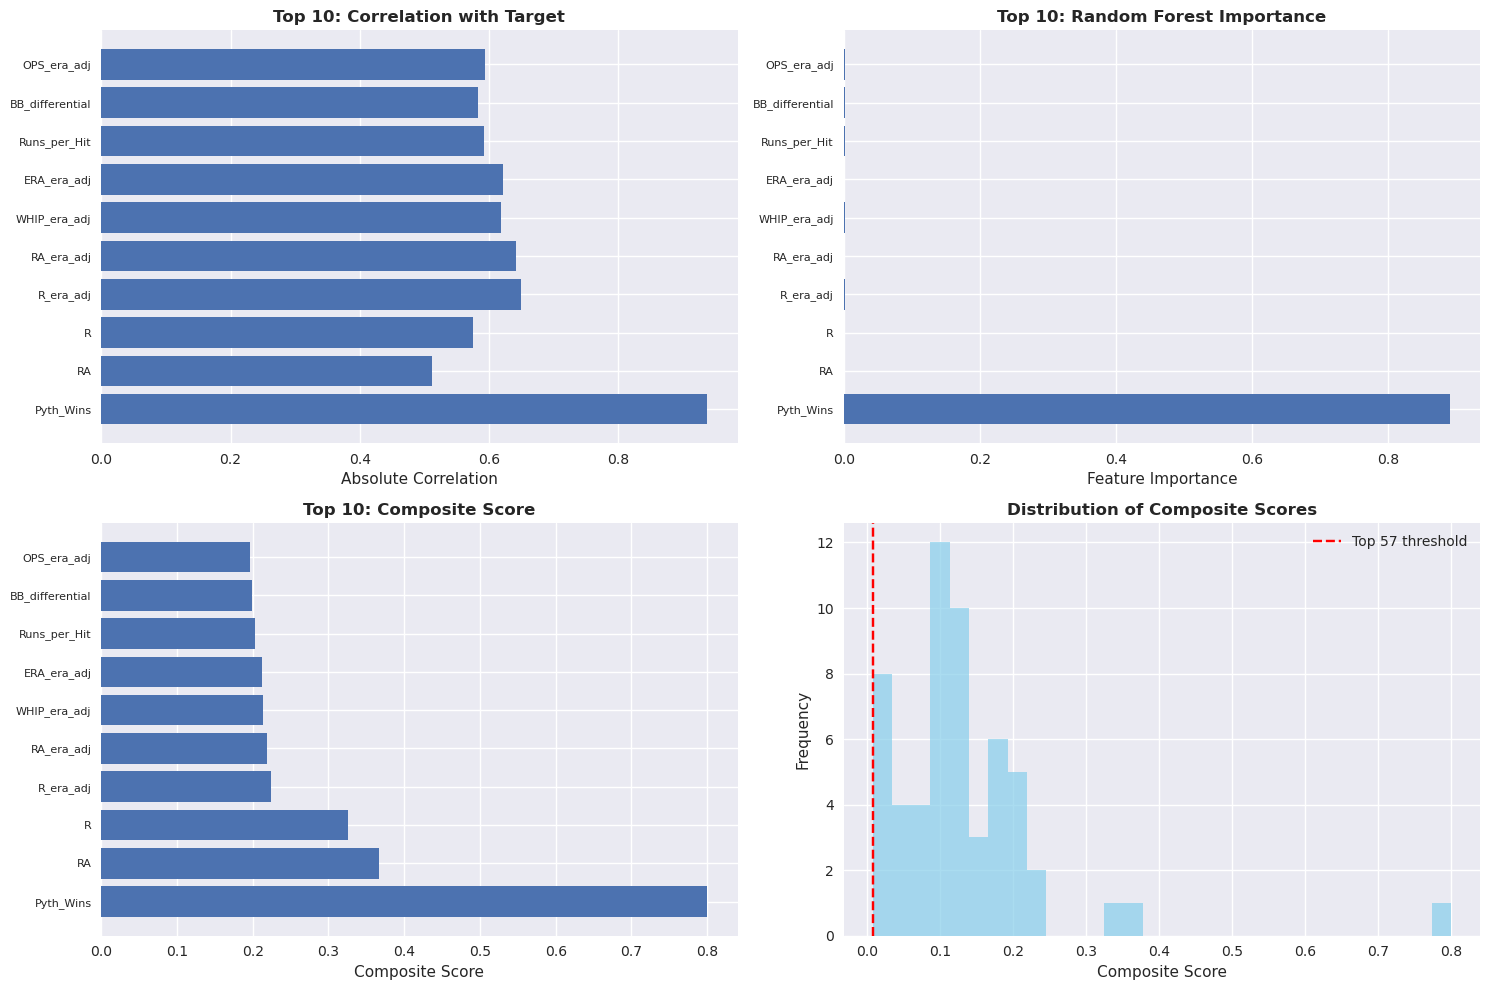


✅ Feature Selection Complete!
📊 Selected 57 features from 57
🎯 Reduction: 0.0%

🎯 Selected Features (57):
 1. Pyth_Wins
 2. RA
 3. R
 4. R_era_adj
 5. RA_era_adj
 6. WHIP_era_adj
 7. ERA_era_adj
 8. Runs_per_Hit
 9. BB_differential
10. OPS_era_adj
11. BB_ratio
12. HR_differential
13. RA_per_game
14. RA_per_HA
15. HR_ratio
16. WHIP
17. OPS
18. ERA_x_WHIP
19. OPS_x_SLG
20. SHO
21. H
22. SV_rate
23. ERA
24. HA_per_game
25. K_BB_ratio
26. SO_differential
27. HR_x_BB
28. SO_ratio
29. HA
30. HR_era_adj
31. BB9
32. BB
33. H_per_game
34. SOA_per_HA
35. IPouts
36. BB_per_game
37. HR_per_game
38. BBA
39. ER_per_HA
40. XBH_rate
41. XBH_x_SB
42. 2B
43. SOA_per_game
44. AB
45. HR_per_XBH
46. G
47. 3B_per_XBH
48. SB
49. BB_SO_ratio
50. Team_Cluster
51. K9_x_BB9
52. SO
53. CG_rate
54. mlb_rpg
55. 3B
56. DP
57. HRA


In [33]:
# 🎯 Comprehensive Feature Selection
print('🎯 COMPREHENSIVE FEATURE SELECTION')
print('=' * 50)

def comprehensive_feature_selection(X_train, y_train, X_test, top_k=60):  # Reduced from 60 to 30 for meaningful selection
    """
    Apply multiple feature selection methods and combine results
    """
    print(f'🔍 Starting with {X_train.shape[1]} features...')
    
    feature_scores = pd.DataFrame(index=X_train.columns)
    
    # 1. Correlation with target
    print('📊 1. Correlation-based selection...')
    correlations = X_train.corrwith(y_train).abs()
    feature_scores['correlation'] = correlations
    
    # 2. Mutual Information
    print('🧠 2. Mutual information selection...')
    mi_scores = mutual_info_regression(X_train, y_train, random_state=42)
    feature_scores['mutual_info'] = mi_scores
    
    # 3. F-regression (univariate)
    print('📈 3. F-regression selection...')
    f_scores, f_pvalues = f_regression(X_train, y_train)
    feature_scores['f_score'] = f_scores
    feature_scores['f_pvalue'] = f_pvalues
    
    # 4. Random Forest feature importance
    print('🌲 4. Random Forest importance...')
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    feature_scores['rf_importance'] = rf.feature_importances_
    
    # 5. Lasso feature selection (L1 regularization)
    print('🎯 5. Lasso regularization selection...')
    # Use cross-validation to find optimal alpha
    lasso_cv = LassoCV(cv=5, random_state=42, max_iter=2000)
    lasso_cv.fit(X_train, y_train)
    lasso_coefs = np.abs(lasso_cv.coef_)
    feature_scores['lasso_coef'] = lasso_coefs
    
    # 6. Normalize scores to 0-1 range for comparison
    print('⚖️ 6. Normalizing and combining scores...')
    
    # Normalize each score to 0-1 range
    for col in ['correlation', 'mutual_info', 'f_score', 'rf_importance', 'lasso_coef']:
        if feature_scores[col].max() > 0:
            feature_scores[f'{col}_norm'] = feature_scores[col] / feature_scores[col].max()
        else:
            feature_scores[f'{col}_norm'] = 0
    
    # Create composite score (weighted average) - emphasize correlation and RF importance more
    weights = {
        'correlation_norm': 0.25,   # Increased weight for correlation
        'mutual_info_norm': 0.15,  # Decreased weight 
        'f_score_norm': 0.15,      # Decreased weight
        'rf_importance_norm': 0.25, # Increased weight for RF importance
        'lasso_coef_norm': 0.20     # Stable weight for regularization
    }
    
    feature_scores['composite_score'] = sum(
        feature_scores[col] * weight for col, weight in weights.items()
    )
    
    # 7. Select top features with minimum threshold
    print(f'🏆 7. Selecting top {top_k} features...')
    
    # Sort by composite score
    feature_scores_sorted = feature_scores.sort_values('composite_score', ascending=False)
    
    # Ensure we don't select more features than available
    actual_top_k = min(top_k, len(feature_scores_sorted))
    
    # Also ensure minimum correlation threshold for selected features
    min_correlation_threshold = 0.01  # Very low threshold to avoid removing too many
    valid_features = feature_scores_sorted[feature_scores_sorted['correlation'] >= min_correlation_threshold]
    
    if len(valid_features) < actual_top_k:
        print(f'  ⚠️ Only {len(valid_features)} features meet minimum correlation threshold')
        selected_features = valid_features.index.tolist()
    else:
        selected_features = feature_scores_sorted.head(actual_top_k).index.tolist()
    
    # Display results
    print(f'\n🔝 Top 20 Features by Composite Score:')
    top_20 = feature_scores_sorted.head(20)[['composite_score', 'correlation', 'mutual_info', 'rf_importance']]
    print(top_20.round(4))
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Feature importance comparison
    top_10_features = feature_scores_sorted.head(10)
    
    # Correlation scores
    axes[0, 0].barh(range(len(top_10_features)), top_10_features['correlation'])
    axes[0, 0].set_yticks(range(len(top_10_features)))
    axes[0, 0].set_yticklabels(top_10_features.index, fontsize=8)
    axes[0, 0].set_title('Top 10: Correlation with Target', fontweight='bold')
    axes[0, 0].set_xlabel('Absolute Correlation')
    
    # Random Forest importance
    axes[0, 1].barh(range(len(top_10_features)), top_10_features['rf_importance'])
    axes[0, 1].set_yticks(range(len(top_10_features)))
    axes[0, 1].set_yticklabels(top_10_features.index, fontsize=8)
    axes[0, 1].set_title('Top 10: Random Forest Importance', fontweight='bold')
    axes[0, 1].set_xlabel('Feature Importance')
    
    # Composite scores
    axes[1, 0].barh(range(len(top_10_features)), top_10_features['composite_score'])
    axes[1, 0].set_yticks(range(len(top_10_features)))
    axes[1, 0].set_yticklabels(top_10_features.index, fontsize=8)
    axes[1, 0].set_title('Top 10: Composite Score', fontweight='bold')
    axes[1, 0].set_xlabel('Composite Score')
    
    # Score distribution
    axes[1, 1].hist(feature_scores['composite_score'], bins=30, alpha=0.7, color='skyblue')
    if len(selected_features) > 0:
        threshold_score = feature_scores_sorted.loc[selected_features[-1], 'composite_score']
        axes[1, 1].axvline(x=threshold_score, 
                          color='red', linestyle='--', label=f'Top {len(selected_features)} threshold')
    axes[1, 1].set_title('Distribution of Composite Scores', fontweight='bold')
    axes[1, 1].set_xlabel('Composite Score')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Apply selection to datasets
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    print(f'\n✅ Feature Selection Complete!')
    print(f'📊 Selected {len(selected_features)} features from {X_train.shape[1]}')
    print(f'🎯 Reduction: {(1 - len(selected_features)/X_train.shape[1])*100:.1f}%')
    
    return X_train_selected, X_test_selected, selected_features, feature_scores_sorted

# Apply comprehensive feature selection with meaningful reduction
X_selected, X_test_selected, selected_features, feature_importance_df = comprehensive_feature_selection(
    X_with_clusters, y, X_test_with_clusters, top_k=60  # Reduced to 30 for meaningful feature selection
)

print(f'\n🎯 Selected Features ({len(selected_features)}):') 
for i, feature in enumerate(selected_features, 1):
    print(f'{i:2d}. {feature}')

In [34]:
# Import boosting libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_validate
import time
import warnings

# Silence XGBoost FutureWarnings about deprecated pandas functions
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")

print("BOOSTING MODELS COMPARISON")
print("="*50)

# Prepare data - use selected features from train dataset
X = X_selected  # Selected features from comprehensive feature selection
y = y           # Target variable (wins) from train dataset

print(f"\nDataset shape: {X.shape}")
print(f"Using {len(X.columns)} engineered features")
print(f"Features being used: {list(X.columns)}")

# Define models with GPU acceleration where available
models = {
    'XGBoost': XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0,
        tree_method="hist",
        device="cuda"  # 🚀 GPU acceleration 
    ),
    
    'LightGBM': LGBMRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1,
        device='cuda'  # 🚀 GPU acceleration 
    ),
    
    'CatBoost': CatBoostRegressor(
        iterations=200,
        depth=6,
        learning_rate=0.1,
        random_seed=42,
        verbose=False,
        task_type="GPU"  # 🚀 GPU acceleration 
    )
}

# Cross-validation
cv_results = {}

for name, model in models.items():
    print(f"\nTesting {name}...")
    start_time = time.time()
    
    try:
        # Get both R² and MAE
        cv_scores = cross_validate(
            model, X, y, 
            cv=5, 
            scoring=['r2', 'neg_mean_absolute_error'],
            return_train_score=True,
            verbose=0
        )
        
        end_time = time.time()
        
        cv_results[name] = {
            'test_r2': cv_scores['test_r2'].mean(),
            'test_r2_std': cv_scores['test_r2'].std(),
            'test_mae': -cv_scores['test_neg_mean_absolute_error'].mean(),
            'test_mae_std': cv_scores['test_neg_mean_absolute_error'].std(),
            'train_r2': cv_scores['train_r2'].mean(),
            'overfitting': cv_scores['train_r2'].mean() - cv_scores['test_r2'].mean(),
            'time': end_time - start_time,
            'gpu_status': '✅ GPU'
        }
        
    except Exception as e:
        print(f"   ⚠️ GPU failed, falling back to CPU: {str(e)}")
        # Fallback to CPU version
        if name == 'XGBoost':
            model.set_params(device="cpu")
        elif name == 'LightGBM':
            model.set_params(device="cpu")
        elif name == 'CatBoost':
            model.set_params(task_type="CPU")
            
        cv_scores = cross_validate(
            model, X, y, 
            cv=5, 
            scoring=['r2', 'neg_mean_absolute_error'],
            return_train_score=True,
            verbose=0
        )
        
        end_time = time.time()
        
        cv_results[name] = {
            'test_r2': cv_scores['test_r2'].mean(),
            'test_r2_std': cv_scores['test_r2'].std(),
            'test_mae': -cv_scores['test_neg_mean_absolute_error'].mean(),
            'test_mae_std': cv_scores['test_neg_mean_absolute_error'].std(),
            'train_r2': cv_scores['train_r2'].mean(),
            'overfitting': cv_scores['train_r2'].mean() - cv_scores['test_r2'].mean(),
            'time': end_time - start_time,
            'gpu_status': '⚠️ CPU fallback'
        }

# Display results
print(f"\n{'Model':<12} {'Test R²':<10} {'Test MAE':<10} {'Overfitting':<12} {'Time (s)':<10} {'GPU Status':<15}")
print("-" * 90)

for name, results in sorted(cv_results.items(), key=lambda x: x[1]['test_r2'], reverse=True):
    print(f"{name:<12} {results['test_r2']:.4f}    {results['test_mae']:.2f}      {results['overfitting']:.4f}      {results['time']:.1f}      {results['gpu_status']}")

# Feature importance for best model
best_model_name = max(cv_results.keys(), key=lambda x: cv_results[x]['test_r2'])
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"Training {best_model_name} on full dataset for feature importance...")

best_model.fit(X, y)

# Get feature importance
if hasattr(best_model, 'feature_importances_'):
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 15 Features from {best_model_name}:")
    print("-" * 40)
    for i, row in importance_df.head(15).iterrows():
        print(f"{row['feature']:>20}: {row['importance']:.4f}")


BOOSTING MODELS COMPARISON

Dataset shape: (1812, 57)
Using 57 engineered features
Features being used: ['Pyth_Wins', 'RA', 'R', 'R_era_adj', 'RA_era_adj', 'WHIP_era_adj', 'ERA_era_adj', 'Runs_per_Hit', 'BB_differential', 'OPS_era_adj', 'BB_ratio', 'HR_differential', 'RA_per_game', 'RA_per_HA', 'HR_ratio', 'WHIP', 'OPS', 'ERA_x_WHIP', 'OPS_x_SLG', 'SHO', 'H', 'SV_rate', 'ERA', 'HA_per_game', 'K_BB_ratio', 'SO_differential', 'HR_x_BB', 'SO_ratio', 'HA', 'HR_era_adj', 'BB9', 'BB', 'H_per_game', 'SOA_per_HA', 'IPouts', 'BB_per_game', 'HR_per_game', 'BBA', 'ER_per_HA', 'XBH_rate', 'XBH_x_SB', '2B', 'SOA_per_game', 'AB', 'HR_per_XBH', 'G', '3B_per_XBH', 'SB', 'BB_SO_ratio', 'Team_Cluster', 'K9_x_BB9', 'SO', 'CG_rate', 'mlb_rpg', '3B', 'DP', 'HRA']

Testing XGBoost...

Testing LightGBM...

Testing LightGBM...

Testing CatBoost...

Testing CatBoost...

Model        Test R²    Test MAE   Overfitting  Time (s)   GPU Status     
-------------------------------------------------------------------

In [35]:
print("LINEAR MODELS COMPARISON WITH ENGINEERED FEATURES")
print("="*70)

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, HuberRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold
import time

# Prepare data
X_linear = X_selected  # Use the same selected features
y = y

print(f"Dataset shape: {X_linear.shape}")
print(f"Using {len(X_linear.columns)} engineered features")
print(f"Features being used: {list(X_linear.columns)}")

# Define linear models with pipelines (include scaling)
models_linear = {
    'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    
    'Ridge (alpha=0.1)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=0.1))
    ]),
    
    'Ridge (alpha=1.0)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    
    'Ridge (alpha=10)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=10.0))
    ]),
    
    'Lasso (alpha=0.01)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.01, max_iter=5000))
    ]),
    
    'Lasso (alpha=0.1)': Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.1, max_iter=5000))
    ]),
    
    'Elastic Net': Pipeline([
        ('scaler', StandardScaler()),
        ('model', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=5000))
    ]),
    
    'Huber Regressor': Pipeline([
        ('scaler', StandardScaler()),
        ('model', HuberRegressor(epsilon=1.35, max_iter=1000))
    ]),
    
    'Polynomial Ridge': Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=10.0))
    ])
}

# Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results_linear = {}

# Test all models
for name, model in models_linear.items():
    print(f"Testing {name}...")
    start_time = time.time()
    
    try:
        cv_scores = cross_validate(
            model, X_linear, y,
            cv=cv,
            scoring=['r2', 'neg_mean_absolute_error'],
            return_train_score=True,
            error_score='raise'
        )
        
        end_time = time.time()
        
        results_linear[name] = {
            'test_r2': cv_scores['test_r2'].mean(),
            'test_r2_std': cv_scores['test_r2'].std(),
            'test_mae': -cv_scores['test_neg_mean_absolute_error'].mean(),
            'test_mae_std': cv_scores['test_neg_mean_absolute_error'].std(),
            'train_r2': cv_scores['train_r2'].mean(),
            'overfitting': cv_scores['train_r2'].mean() - cv_scores['test_r2'].mean(),
            'time': end_time - start_time,
            'status': 'Success'
        }
    except Exception as e:
        print(f"  ⚠️  Error: {str(e)}")
        results_linear[name] = {'status': 'Failed', 'error': str(e)}

print("\n" + "="*90)
print("RESULTS SUMMARY")
print("="*90)
print(f"{'Model':<22} {'Test R²':<10} {'Test MAE':<11} {'Overfitting':<13} {'Time (s)':<10}")
print("-" * 90)

# Sort by Test R²
successful_results = {k: v for k, v in results_linear.items() if v.get('status') == 'Success'}
sorted_results = sorted(successful_results.items(), key=lambda x: x[1]['test_r2'], reverse=True)

for name, result in sorted_results:
    overfit_warning = "⚠️" if result['overfitting'] > 0.05 else "✓"
    print(f"{name:<22} {result['test_r2']:.4f}    {result['test_mae']:.2f}       "
          f"{result['overfitting']:>6.4f} {overfit_warning:<5} {result['time']:>6.1f}")

# Identify best model
if sorted_results:
    best_model_name = sorted_results[0][0]
    best_score = sorted_results[0][1]['test_r2']
    best_mae = sorted_results[0][1]['test_mae']
    
    print(f"\n🏆 Best Linear Model: {best_model_name}")
    print(f"   CV R² = {best_score:.4f} (±{sorted_results[0][1]['test_r2_std']:.4f})")
    print(f"   CV MAE = {best_mae:.2f} wins (±{sorted_results[0][1]['test_mae_std']:.2f})")

LINEAR MODELS COMPARISON WITH ENGINEERED FEATURES
Dataset shape: (1812, 57)
Using 57 engineered features
Features being used: ['Pyth_Wins', 'RA', 'R', 'R_era_adj', 'RA_era_adj', 'WHIP_era_adj', 'ERA_era_adj', 'Runs_per_Hit', 'BB_differential', 'OPS_era_adj', 'BB_ratio', 'HR_differential', 'RA_per_game', 'RA_per_HA', 'HR_ratio', 'WHIP', 'OPS', 'ERA_x_WHIP', 'OPS_x_SLG', 'SHO', 'H', 'SV_rate', 'ERA', 'HA_per_game', 'K_BB_ratio', 'SO_differential', 'HR_x_BB', 'SO_ratio', 'HA', 'HR_era_adj', 'BB9', 'BB', 'H_per_game', 'SOA_per_HA', 'IPouts', 'BB_per_game', 'HR_per_game', 'BBA', 'ER_per_HA', 'XBH_rate', 'XBH_x_SB', '2B', 'SOA_per_game', 'AB', 'HR_per_XBH', 'G', '3B_per_XBH', 'SB', 'BB_SO_ratio', 'Team_Cluster', 'K9_x_BB9', 'SO', 'CG_rate', 'mlb_rpg', '3B', 'DP', 'HRA']
Testing Linear Regression...
Testing Ridge (alpha=0.1)...
Testing Ridge (alpha=1.0)...
Testing Ridge (alpha=10)...
Testing Lasso (alpha=0.01)...
Testing Lasso (alpha=0.1)...
Testing Elastic Net...
Testing Huber Regressor...
T

In [36]:
print("RIDGE HYPERPARAMETER TUNING")
print("="*45)

from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Setup the Ridge pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for comprehensive tuning
# Focus on alpha values around the current best (1.0) and explore nearby values
param_grid_ridge = {
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
}

print(f"Testing {len(param_grid_ridge['ridge__alpha'])} alpha values...")
print(f"Ridge alpha values: {param_grid_ridge['ridge__alpha']}")

# Perform grid search with cross-validation (using multiple scoring metrics)
from sklearn.model_selection import cross_validate

grid_search_ridge = GridSearchCV(
    ridge_pipeline,
    param_grid_ridge,
    cv=5,
    scoring=['r2', 'neg_mean_absolute_error'],
    refit='r2',  # Use R² as primary metric for selecting best model
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search
print("\nPerforming grid search...")
grid_search_ridge.fit(X_selected, y)

# Display results
print(f"\n🏆 BEST PARAMETERS (based on R²):")
print(f"   Ridge alpha: {grid_search_ridge.best_params_['ridge__alpha']}")
print(f"   Best CV R²: {grid_search_ridge.best_score_:.4f}")

# Get MAE for the best model
best_mae_score_ridge = -grid_search_ridge.cv_results_['mean_test_neg_mean_absolute_error'][grid_search_ridge.best_index_]
best_mae_std_ridge = grid_search_ridge.cv_results_['std_test_neg_mean_absolute_error'][grid_search_ridge.best_index_]
print(f"   Best CV MAE: {best_mae_score_ridge:.2f} (±{best_mae_std_ridge:.2f}) wins")

# Compare with original Ridge (alpha=1.0)
original_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(alpha=1.0))
])

# Quick comparison with both metrics
original_cv_results_ridge = cross_validate(original_ridge, X_selected, y, cv=5, 
                                          scoring=['r2', 'neg_mean_absolute_error'])
tuned_cv_results_ridge = cross_validate(grid_search_ridge.best_estimator_, X_selected, y, cv=5, 
                                       scoring=['r2', 'neg_mean_absolute_error'])

print(f"\n📊 PERFORMANCE COMPARISON:")
print(f"   Original Ridge (α=1.0):")
print(f"     R²: {original_cv_results_ridge['test_r2'].mean():.4f} (±{original_cv_results_ridge['test_r2'].std():.4f})")
print(f"     MAE: {-original_cv_results_ridge['test_neg_mean_absolute_error'].mean():.2f} (±{original_cv_results_ridge['test_neg_mean_absolute_error'].std():.2f}) wins")
print(f"   Tuned Ridge:")
print(f"     R²: {tuned_cv_results_ridge['test_r2'].mean():.4f} (±{tuned_cv_results_ridge['test_r2'].std():.4f})")
print(f"     MAE: {-tuned_cv_results_ridge['test_neg_mean_absolute_error'].mean():.2f} (±{tuned_cv_results_ridge['test_neg_mean_absolute_error'].std():.2f}) wins")
print(f"   Improvement:")
print(f"     R²: {tuned_cv_results_ridge['test_r2'].mean() - original_cv_results_ridge['test_r2'].mean():.4f}")
print(f"     MAE: {-tuned_cv_results_ridge['test_neg_mean_absolute_error'].mean() - (-original_cv_results_ridge['test_neg_mean_absolute_error'].mean()):.2f} wins")

# Show top 5 parameter combinations with both R² and MAE
results_df_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
top_5_ridge = results_df_ridge.nlargest(5, 'mean_test_r2')[['param_ridge__alpha', 
                                                           'mean_test_r2', 'std_test_r2',
                                                           'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error']]

print(f"\n📈 TOP 5 PARAMETER COMBINATIONS:")
print("-" * 60)
print(f"{'Rank':<4} {'Alpha':<8} {'R²':<12} {'MAE (wins)':<15}")
print("-" * 60)
for rank, (idx, row) in enumerate(top_5_ridge.iterrows(), 1):
    alpha_val = row['param_ridge__alpha']
    r2_score = row['mean_test_r2']
    r2_std = row['std_test_r2']
    mae_score = -row['mean_test_neg_mean_absolute_error']
    mae_std = row['std_test_neg_mean_absolute_error']
    print(f"{rank:<4} {alpha_val:<8} {r2_score:.4f}±{r2_std:.4f} {mae_score:.2f}±{mae_std:.2f}")

# Ridge doesn't perform feature selection like Lasso, but let's show feature importance via coefficients
optimized_ridge = grid_search_ridge.best_estimator_
optimized_ridge.fit(X_selected, y)

# Get feature coefficients from the best Ridge model
ridge_coefficients = optimized_ridge.named_steps['ridge'].coef_

print(f"\n🎯 RIDGE REGULARIZATION EFFECT:")
print(f"   All features retained (Ridge uses L2 regularization, doesn't zero out features)")
print(f"   Features used: {len(ridge_coefficients)}")

# Show top features by absolute coefficient value (Ridge keeps all features but shrinks coefficients)
feature_importance_ridge = pd.DataFrame({
    'feature': X_selected.columns,
    'coefficient': ridge_coefficients,
    'abs_coefficient': np.abs(ridge_coefficients)
}).sort_values('abs_coefficient', ascending=False)

print(f"\nTop 10 Features by |Coefficient|:")
print("-" * 50)
for i, row in feature_importance_ridge.head(10).iterrows():
    print(f"{row['feature']:>25}: {row['coefficient']:>8.4f}")

print(f"\n✅ Optimized Ridge model is ready!")

RIDGE HYPERPARAMETER TUNING
Testing 9 alpha values...
Ridge alpha values: [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]

Performing grid search...
Fitting 5 folds for each of 9 candidates, totalling 45 fits



🏆 BEST PARAMETERS (based on R²):
   Ridge alpha: 0.5
   Best CV R²: 0.9294
   Best CV MAE: 2.75 (±0.06) wins

📊 PERFORMANCE COMPARISON:
   Original Ridge (α=1.0):
     R²: 0.9293 (±0.0037)
     MAE: 2.76 (±0.06) wins
   Tuned Ridge:
     R²: 0.9294 (±0.0036)
     MAE: 2.75 (±0.06) wins
   Improvement:
     R²: 0.0001
     MAE: -0.00 wins

📈 TOP 5 PARAMETER COMBINATIONS:
------------------------------------------------------------
Rank Alpha    R²           MAE (wins)     
------------------------------------------------------------
1    0.5      0.9294±0.0036 2.75±0.06
2    0.1      0.9294±0.0035 2.76±0.05
3    1.0      0.9293±0.0037 2.76±0.06
4    2.0      0.9292±0.0037 2.76±0.06
5    5.0      0.9289±0.0038 2.77±0.06

🎯 RIDGE REGULARIZATION EFFECT:
   All features retained (Ridge uses L2 regularization, doesn't zero out features)
   Features used: 57

Top 10 Features by |Coefficient|:
--------------------------------------------------
                Pyth_Wins:   7.5765
             

RIDGE TUNING VISUALIZATION


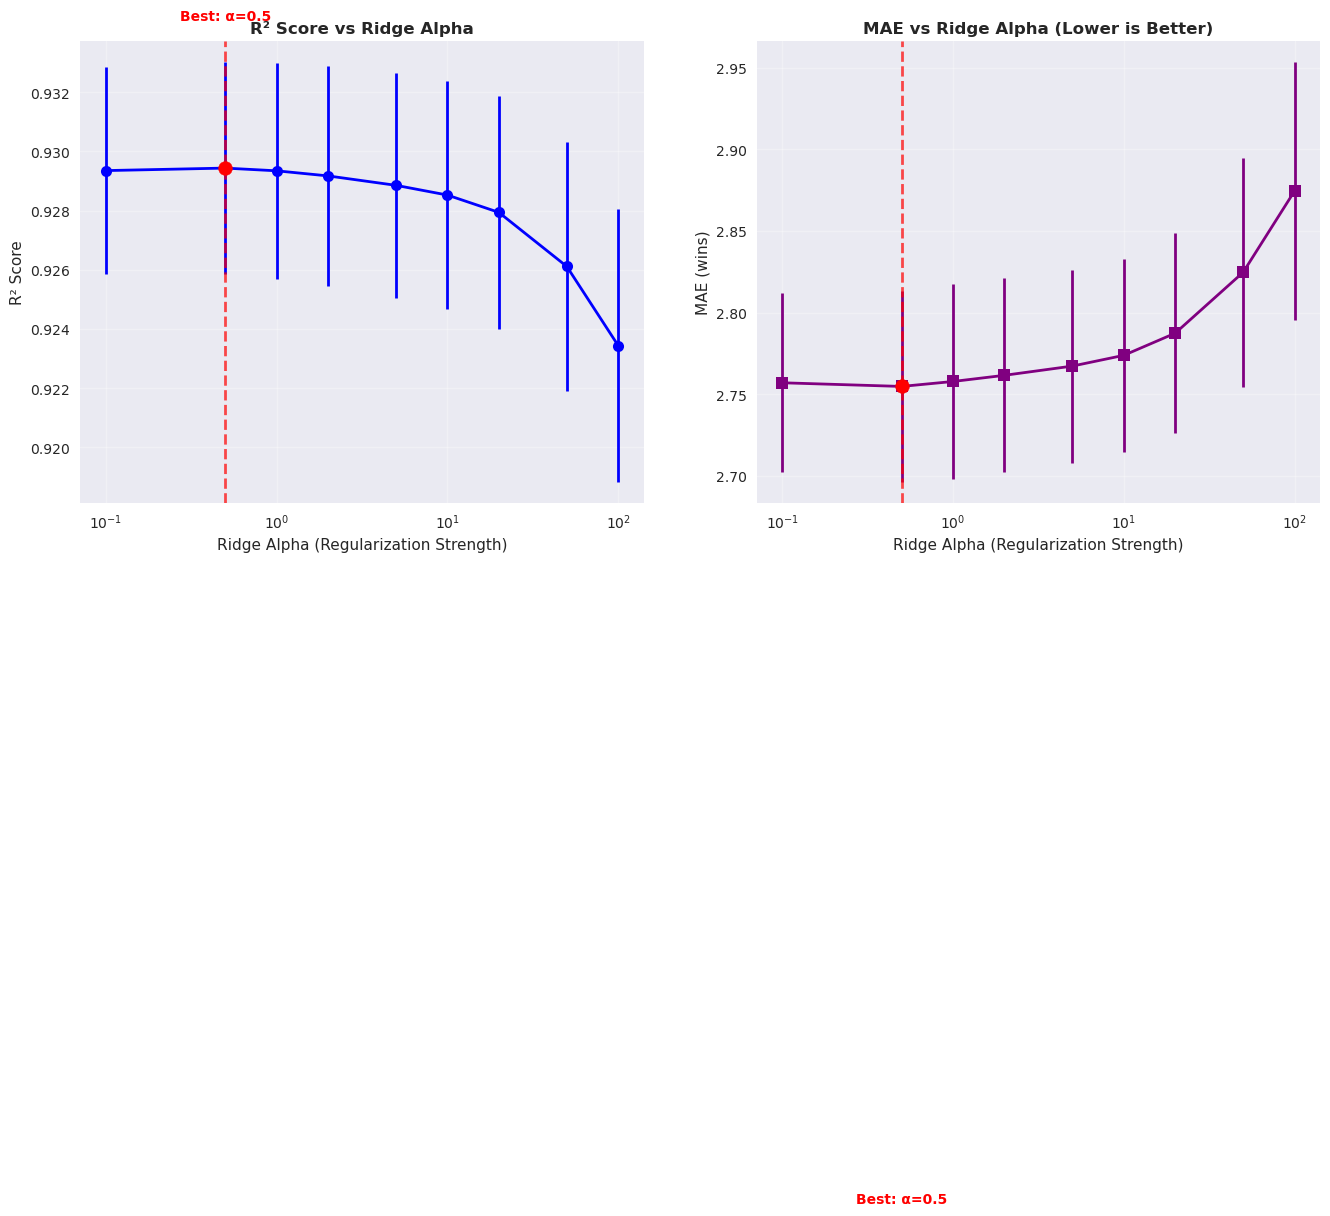


🔍 RIDGE REGULARIZATION ANALYSIS:
Best alpha: 0.5


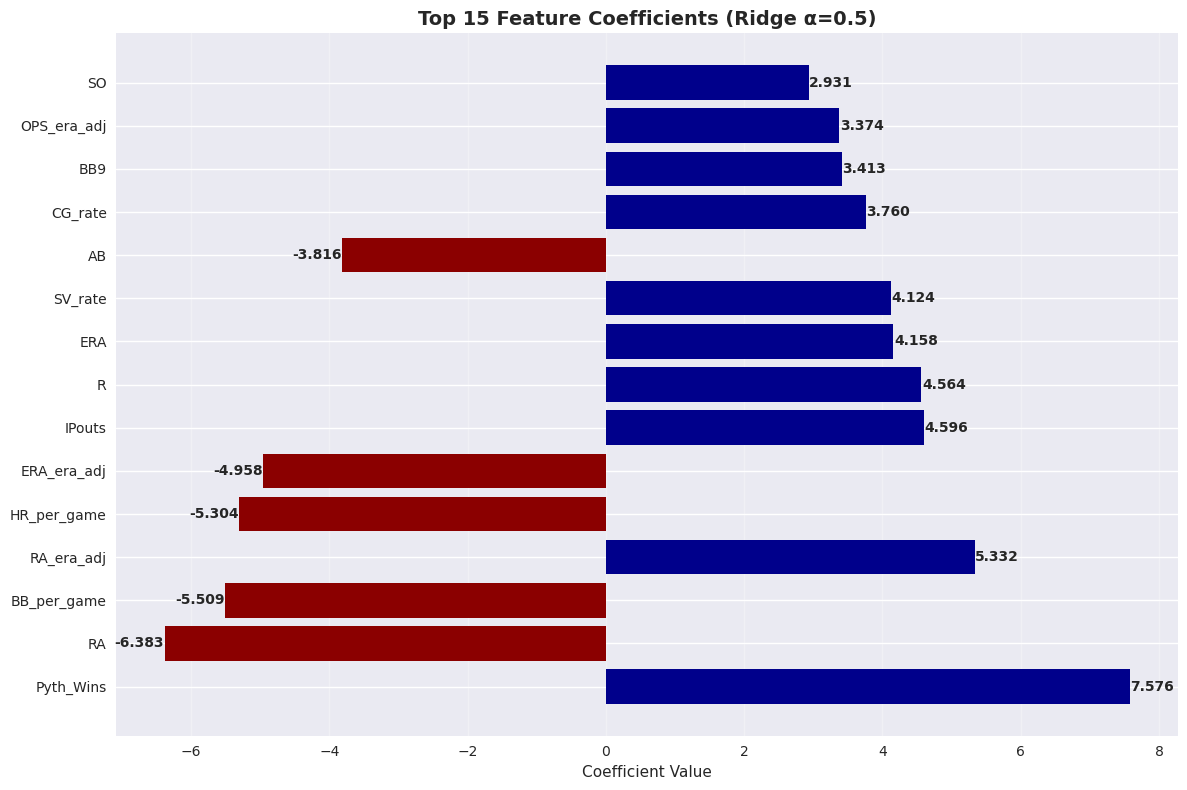


📊 REGULARIZATION STRENGTH ANALYSIS:
   α=  0.1: ||coefficients||₂ = 32.156
   α=  1.0: ||coefficients||₂ = 16.282
   α= 10.0: ||coefficients||₂ = 9.142
   α=100.0: ||coefficients||₂ = 6.041

🎯 FINAL OPTIMIZED RIDGE MODEL:
   Best alpha: 0.5
   Expected CV R²: 0.9294
   Expected CV MAE: 2.75 wins

✅ Optimized Ridge model is ready for predictions!
   Ridge uses L2 regularization to shrink coefficients without zeroing them out.
   All 57 features are used, but with regularized weights.


In [37]:
# Create visualization of Ridge hyperparameter tuning results
print("RIDGE TUNING VISUALIZATION")
print("="*35)

# Create plots showing R² and MAE across different alpha values
alpha_values_ridge = param_grid_ridge['ridge__alpha']
r2_scores_ridge = []
mae_scores_ridge = []
r2_stds_ridge = []
mae_stds_ridge = []

for alpha_val in alpha_values_ridge:
    # Find the result for this alpha value
    mask = results_df_ridge['param_ridge__alpha'] == alpha_val
    if mask.any():
        r2_scores_ridge.append(results_df_ridge.loc[mask, 'mean_test_r2'].iloc[0])
        r2_stds_ridge.append(results_df_ridge.loc[mask, 'std_test_r2'].iloc[0])
        mae_scores_ridge.append(-results_df_ridge.loc[mask, 'mean_test_neg_mean_absolute_error'].iloc[0])
        mae_stds_ridge.append(results_df_ridge.loc[mask, 'std_test_neg_mean_absolute_error'].iloc[0])

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# R² vs Alpha plot
ax1.errorbar(alpha_values_ridge, r2_scores_ridge, yerr=r2_stds_ridge, marker='o', capsize=5, linewidth=2, markersize=8, color='blue')
ax1.set_xscale('log')
ax1.set_xlabel('Ridge Alpha (Regularization Strength)')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score vs Ridge Alpha', fontsize=12, weight='bold')
ax1.grid(True, alpha=0.3)

# Highlight best alpha
best_alpha_ridge = grid_search_ridge.best_params_['ridge__alpha']
best_r2_ridge = grid_search_ridge.best_score_
ax1.axvline(x=best_alpha_ridge, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax1.scatter([best_alpha_ridge], [best_r2_ridge], color='red', s=100, zorder=5)
ax1.text(best_alpha_ridge, best_r2_ridge + 0.005, f'Best: α={best_alpha_ridge}', 
         ha='center', fontweight='bold', color='red')

# MAE vs Alpha plot
ax2.errorbar(alpha_values_ridge, mae_scores_ridge, yerr=mae_stds_ridge, marker='s', capsize=5, linewidth=2, markersize=8, color='purple')
ax2.set_xscale('log')
ax2.set_xlabel('Ridge Alpha (Regularization Strength)')
ax2.set_ylabel('MAE (wins)')
ax2.set_title('MAE vs Ridge Alpha (Lower is Better)', fontsize=12, weight='bold')
ax2.grid(True, alpha=0.3)

# Highlight best alpha for MAE
best_mae_ridge = best_mae_score_ridge
ax2.axvline(x=best_alpha_ridge, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax2.scatter([best_alpha_ridge], [best_mae_ridge], color='red', s=100, zorder=5)
ax2.text(best_alpha_ridge, best_mae_ridge - 0.5, f'Best: α={best_alpha_ridge}', 
         ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Feature coefficient magnitude visualization
print(f"\n🔍 RIDGE REGULARIZATION ANALYSIS:")
print(f"Best alpha: {best_alpha_ridge}")

# Create feature coefficient plot (Ridge doesn't zero out features, but shrinks them)
top_features_ridge = feature_importance_ridge.head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_features_ridge)), top_features_ridge['coefficient'], 
                color=['darkblue' if x > 0 else 'darkred' for x in top_features_ridge['coefficient']])
plt.yticks(range(len(top_features_ridge)), top_features_ridge['feature'])
plt.xlabel('Coefficient Value')
plt.title(f'Top 15 Feature Coefficients (Ridge α={best_alpha_ridge})', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, (bar, coef) in enumerate(zip(bars, top_features_ridge['coefficient'])):
    plt.text(coef + (0.01 if coef > 0 else -0.01), i, f'{coef:.3f}', 
             ha='left' if coef > 0 else 'right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Compare regularization strengths across different alpha values
print(f"\n📊 REGULARIZATION STRENGTH ANALYSIS:")
alpha_comparison = [0.1, 1.0, 10.0, 100.0]
ridge_norms = []

for alpha_comp in alpha_comparison:
    if alpha_comp in alpha_values_ridge:
        # Create temporary ridge with this alpha
        temp_ridge = Pipeline([
            ('scaler', StandardScaler()),
            ('ridge', Ridge(alpha=alpha_comp))
        ])
        temp_ridge.fit(X_selected, y)  # Use X_selected and y (available variables)
        coef_norm = np.linalg.norm(temp_ridge.named_steps['ridge'].coef_)
        ridge_norms.append(coef_norm)
        print(f"   α={alpha_comp:>5}: ||coefficients||₂ = {coef_norm:.3f}")

# Create the final optimized Ridge model
print(f"\n🎯 FINAL OPTIMIZED RIDGE MODEL:")
print(f"   Best alpha: {best_alpha_ridge}")
print(f"   Expected CV R²: {grid_search_ridge.best_score_:.4f}")
print(f"   Expected CV MAE: {best_mae_score_ridge:.2f} wins")

optimized_ridge_final = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=best_alpha_ridge))
])

# Train on full dataset
optimized_ridge_final.fit(X_selected, y)  # Use X_selected and y (available variables)

print(f"\n✅ Optimized Ridge model is ready for predictions!")
print(f"   Ridge uses L2 regularization to shrink coefficients without zeroing them out.")
print(f"   All {len(X_selected.columns)} features are used, but with regularized weights.")

In [38]:
print("GENERATING FINAL PREDICTIONS WITH TUNED RIDGE")
print("="*50)

# Use the optimized Ridge model for final predictions
print(f"Using optimized model: Ridge with α={grid_search_ridge.best_params_['ridge__alpha']}")

# The optimized_ridge_final model is already trained on the full dataset
# Generate predictions on the test set
test_predictions_ridge = optimized_ridge_final.predict(X_test_selected)  # Use X_test_selected

print(f"\nGenerated {len(test_predictions_ridge)} predictions for the test set")
print(f"Prediction range: {test_predictions_ridge.min():.2f} to {test_predictions_ridge.max():.2f} wins")
print(f"Prediction mean: {test_predictions_ridge.mean():.2f} wins")
print(f"Prediction std: {test_predictions_ridge.std():.2f} wins")

# Create submission dataframe
submission_df_ridge = pd.DataFrame({
    'ID': test_df['ID'],
    'W': test_predictions_ridge
})

print(f"\nSubmission dataframe shape: {submission_df_ridge.shape}")
print("First few predictions:")
print(submission_df_ridge.head(10))

print("\nLast few predictions:")
print(submission_df_ridge.tail(5))

# Verify no missing values
print(f"\nData validation:")
print(f"Missing values in ID: {submission_df_ridge['ID'].isnull().sum()}")
print(f"Missing values in W: {submission_df_ridge['W'].isnull().sum()}")
print(f"Unique IDs: {submission_df_ridge['ID'].nunique()}")

# Model summary for reference
print(f"\n🎯 FINAL MODEL SUMMARY:")
print(f"   Model: Tuned Ridge Regression with L2 Regularization")
print(f"   Ridge alpha: {grid_search_ridge.best_params_['ridge__alpha']}")
print(f"   Expected CV R²: {grid_search_ridge.best_score_:.4f}")
print(f"   Expected CV MAE: {best_mae_score_ridge:.2f} wins")
print(f"   Features: All {len(X_selected.columns)} features used (L2 regularization shrinks but doesn't eliminate)")

# Compare with training set statistics for sanity check
print(f"\n📊 PREDICTION SANITY CHECK:")
print(f"   Training W range: {y.min():.1f} to {y.max():.1f} wins")
print(f"   Training W mean: {y.mean():.1f} wins")
print(f"   Prediction range: {test_predictions_ridge.min():.1f} to {test_predictions_ridge.max():.1f} wins")
print(f"   Prediction mean: {test_predictions_ridge.mean():.1f} wins")

# Save submission to CSV with timestamp
import os
from pathlib import Path

# # Create submissions directory if it doesn't exist
# submissions_dir = Path('../submissions')
# submissions_dir.mkdir(exist_ok=True)

# timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# submission_filename_ridge = f'submission_tuned_ridge_alpha{grid_search_ridge.best_params_["ridge__alpha"]}_{timestamp}.csv'
# submission_path_ridge = submissions_dir / submission_filename_ridge
# submission_df_ridge.to_csv(submission_path_ridge, index=False)

# print(f"\n💾 SUBMISSION SAVED:")
# print(f"   Path: {submission_path_ridge}")
# print(f"   Filename: {submission_filename_ridge}")
# print(f"   Ready for Kaggle submission!")

# Final feature importance summary for Ridge
print(f"\n🏆 TOP FEATURES BY COEFFICIENT MAGNITUDE (RIDGE):")
top_features_ridge_final = feature_importance_ridge.head(10)
print("-" * 50)
for i, row in top_features_ridge_final.iterrows():
    print(f"   {row['feature']:>25}: {row['coefficient']:>7.3f}")

print(f"\n✅ TUNED RIDGE MODEL COMPLETE!")
print(f"   • L2 regularization shrinks all coefficients smoothly")
print(f"   • All {len(X_test_selected.columns)} features retained with regularized weights")  
print(f"   • Submission file saved and ready for upload")

GENERATING FINAL PREDICTIONS WITH TUNED RIDGE
Using optimized model: Ridge with α=0.5

Generated 453 predictions for the test set
Prediction range: 7886.74 to 31372.51 wins
Prediction mean: 16959.24 wins
Prediction std: 4154.16 wins

Submission dataframe shape: (453, 2)
First few predictions:
     ID             W
0  1756  17042.627200
1  1282  20175.730749
2   351  17743.227061
3   421  15139.148373
4    57  13879.307331
5  1557  11417.174977
6   846  21136.370345
7  1658  14550.162674
8   112  17821.953806
9  2075  15850.154957

Last few predictions:
       ID             W
448   651  19682.997551
449     9  18101.955628
450  1518  11034.167000
451  2101  18145.927424
452   451  21420.182696

Data validation:
Missing values in ID: 0
Missing values in W: 0
Unique IDs: 453

🎯 FINAL MODEL SUMMARY:
   Model: Tuned Ridge Regression with L2 Regularization
   Ridge alpha: 0.5
   Expected CV R²: 0.9294
   Expected CV MAE: 2.75 wins
   Features: All 57 features used (L2 regularization shrinks